###### 对于数组和Series来说，维度就是功能shape返回的结果，shape中返回了几个数字，就是几维。索引以外的数据，不分行列的叫一维（此时shape返回唯一的维度上的数据个数），有行列之分叫二维（shape返回行x列），也称为表。一张表最多二维，复数的表构成了更高的维度。当一个数组中存在2张3行4列的表时，shape返回的是(更高维，行，列)。当数组中存在2组2张3行4列的表时，数据就是4维,shape返回（2,2,3,4）

##### 维算法中的”降维“，指的是降低特征矩阵中特征的数量。

![Title](1579583831(1).jpg)

In [1]:
'''在降维过程中，我们会减少特征的数量，这意味着删除数据，数据量变少则表示模型可以获取的信息会变少，
模型的表现可能会因此受影响
PCA使用的信息量衡量指标，就是样本方差，又称可解释性方差，方差越大，特征所带的信息量越多。'''

'在降维过程中，我们会减少特征的数量，这意味着删除数据，数据量变少则表示模型可以获取的信息会变少，\n模型的表现可能会因此受影响\nPCA使用的信息量衡量指标，就是样本方差，又称可解释性方差，方差越大，特征所带的信息量越多。'

classsklearn.decomposition.PCA(n_components=None, copy=True, whiten=False, svd_solver=’auto’, tol=0.0,iterated_power=’auto’, random_state=None)

###### 思考：PCA和特征选择技术都是特征工程的一部分，它们有什么不同？特征工程中有三种方式：特征提取，特征创造和特征选择。仔细观察上面的降维例子和上周我们讲解过的特征选择，你发现有什么不同了吗? 特征选择是从已存在的特征中选取携带信息最多的，选完之后的特征依然具有可解释性，我们依然知道这个特征在原数据的哪个位置，代表着原数据上的什么含义。而PCA，是将已存在的特征进行压缩，降维完毕后的特征不是原本的特征矩阵中的任何一个特征，而是通过某些方式组合起来的新特征。通常来说，在新的特征矩阵生成之前，我们无法知晓PCA都建立了怎样的新特征向量，新特征矩阵生成之后也不具有可读性，我们无法判断新特征矩阵的特征是从原数据中的什么特征组合而来，新特征虽然带有原始数据的信息，却已经不是原数据上代表着的含义了。以PCA为代表的降维算法因此是特征创造（feature creation，或feature construction）的一种。可以想见，PCA一般不适用于探索特征和标签之间的关系的模型（如线性回归），因为无法解释的新特征和标签之间的关系不具有意义。在线性回归模型中，我们使用特征选择

In [2]:
'''重要参数：
n_components:2.2 重要参数n_componentsn_components是我们降维后需要的维度，即降维后需要保留的特征数量，降维流
程中第二步里需要确认的k值，一般输入[0, min(X.shape)]范围中的整数。一说到K，大家可能都会想到，类似于KNN中的K
和随机森林中的n_estimators，这是一个需要我们人为去确认的超参数，并且我们设定的数字会影响到模型的表现。如果留
下的特征太多，就达不到降维的效果，如果留下的特征太少，那新特征向量可能无法容纳原始数据集中的大部分信息'''

'重要参数：\nn_components:2.2 重要参数n_componentsn_components是我们降维后需要的维度，即降维后需要保留的特征数量，降维流\n程中第二步里需要确认的k值，一般输入[0, min(X.shape)]范围中的整数。一说到K，大家可能都会想到，类似于KNN中的K\n和随机森林中的n_estimators，这是一个需要我们人为去确认的超参数，并且我们设定的数字会影响到模型的表现。如果留\n下的特征太多，就达不到降维的效果，如果留下的特征太少，那新特征向量可能无法容纳原始数据集中的大部分信息'

In [25]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

iris = load_iris()
y = iris.target
X = iris.data
X.shape

(150, 4)

In [26]:
import pandas as pd
pd.DataFrame(X)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [6]:
# 调用PCA
pca = PCA(n_components=2) #实例化
pca = pca.fit(X) #拟合模型
X_dr = pca.transform(X) #获取新矩阵

X_dr
#也可以fit_transform一步到位
# X_dr = PCA(2).fit_transform(X)

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

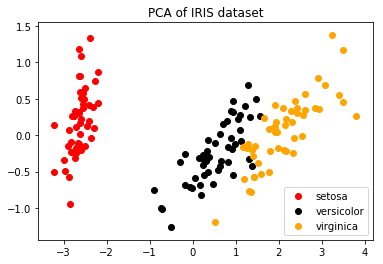

In [10]:
'''要将三种鸢尾花的数据分布显示在二维平面坐标系中，对应的两个坐标（两个特征向量）应该是三种鸢尾花降维后
的x1和x2，怎样才能取出三种鸢尾花下不同的x1和x2呢？'''
X_dr[y == 0, 0] #这里是布尔索引，看出来了么？
#要展示三中分类的分布，需要对三种鸢尾花分别绘图
#可以写成三行代码，也可以写成for循环
"""
plt.figure()
plt.scatter(X_dr[y==0, 0], X_dr[y==0, 1], c="red", label=iris.target_names[0])
plt.scatter(X_dr[y==1, 0], X_dr[y==1, 1], c="black", label=iris.target_names[1])
plt.scatter(X_dr[y==2, 0], X_dr[y==2, 1], c="orange", label=iris.target_names[2])
plt.legend()
plt.title('PCA of IRIS dataset')
plt.show()
"""

colors = ['red','black','orange']
iris.target_names

plt.figure() #画布
for i in range(3):
    plt.scatter(X_dr[y==i,0],X_dr[y==i,1],c=colors[i],label=iris.target_names[i])  #iris.target_name花的名字
plt.legend() #显示图例
plt.title('PCA of IRIS dataset')
plt.show()

In [15]:
'''探索降维后的数据'''
#属性explained_variance_，查看降维后每个新特征向量上所带的信息量大小（可解释性方差的大小）
print('explained_variance:{}'.format(pca.explained_variance_))  #两个特征的可解释方差
#explained_variance:[4.22824171 0.24267075] 大部分信息汇聚在第一个轴上

#属性explained_variance_ratio,查看降维后每个新特征向量所占的信息量占原始数据总信息量的百分比
#又叫做可解释方差贡献率
print('explained_variance_ratio:{}'.format(pca.explained_variance_ratio_))
#大部分信息都被有效地集中在了第一个特征上

print('explained_variance_ratio.sum():{}'.format(pca.explained_variance_ratio_.sum()))

explained_variance:[4.22824171 0.24267075]
explained_variance_ratio:[0.92461872 0.05306648]
explained_variance_ratio.sum():0.977685206318795


###### 选取最好的n_components:累计可解释方差贡献率曲线

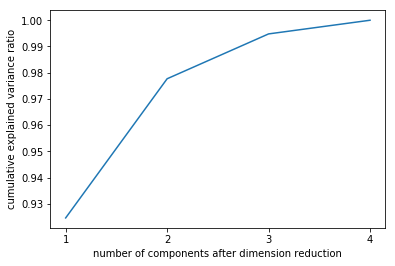

In [16]:
import numpy as np
pca_line = PCA().fit(X) #保留原始特征个数 没有缩减
plt.plot([1,2,3,4],np.cumsum(pca_line.explained_variance_ratio_))#四个特征占原始信息的百分比 累计求和
plt.xticks([1,2,3,4]) #这是为了限制坐标轴显示为整数
plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumulative explained variance ratio")
plt.show()
'''当选择了3个特征是 总信息已经过了99%'''

###### 最大似然估计自选超参数  （这种方法计算量大）

In [18]:
pca_mle = PCA(n_components='mle')
pca_mle = pca_mle.fit(X)
X_mle = pca_mle.transform(X)

X_mle  #可以看到mle为我们自动选择了3个特征

print('explained_variance_ratio_.sum():{}'.format(pca_mle.explained_variance_ratio_.sum()))
'''新的X_mle包含了原特征的99.47%的信息'''

explained_variance_ratio_.sum():0.9947878161267247


###### 按信息量占比选取超参数

In [19]:
pca_f = PCA(n_components=0.97,svd_solver='full')  #我们希望保留97%的信息量 同时svd_solver=full
pca_f = pca_f.fit(X)
X_f = pca_f.transform(X)

print('pca_f.explained_variance_ratio_:{}'.format(pca_f.explained_variance_ratio_))

pca_f.explained_variance_ratio_:[0.92461872 0.05306648]


####  PCA中的SVD
简而言之，SVD在矩阵分解中的过程比PCA简单快速，虽然两个算法都走一样的分解流程，但SVD可以作弊耍赖直接算出V。但是遗憾的是，SVD的信息量衡量指标比较复杂，要理解”奇异值“远不如理解”方差“来得容易，因此，sklearn将降维流程拆成了两部分：一部分是计算特征空间V，由奇异值分解完成，另一部分是映射数据和求解新特征矩阵，由主成分分析完成，实现了用SVD的性质减少计算量，却让信息量的评估指标是方差。

In [20]:
PCA(2).fit(X).components_  #V(k,n)

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [21]:
PCA(2).fit(X).components_.shape  #V（k,X原有的n）

(2, 4)

In [22]:
'''重要参数:
svd_solver:"auto"：基于X.shape和n_components的默认策略来选择分解器：如果输入数据的尺寸大于500x500且要提取的
           特征数小于数据最小维度min(X.shape)的80％，就启用效率更高的”randomized“方法。否则，精确完整的SVD
           将被计算，截断将会在矩阵被分解完成后有选择地发生
           "full"：从scipy.linalg.svd中调用标准的LAPACK分解器来生成精确完整的SVD，适合数据量比较适中，计算时
           间充足的情况
           "arpack"：从scipy.sparse.linalg.svds调用ARPACK分解器来运行截断奇异值分解(SVD truncated)，分解时就
           将特征数量降到n_components中输入的数值k，可以加快运算速度，适合特征矩阵很大的时候，但一般用于特征
           矩阵为稀疏矩阵的情况，此过程包含一定的随机性。
           "randomized"，通过Halko等人的随机方法进行随机SVD。在"full"方法中，分解器会根据原始数据和输入的n_
           components值去计算和寻找符合需求的新特征向量，但是在"randomized"方法中，分解器会先生成多个随机向
           量，然后一一去检测这些随机向量中是否有任何一个符合我们的分解需求，如果符合，就保留这个随机向量，
           并基于这个随机向量来构建后续的向量空间。这个方法已经被Halko等人证明，比"full"模式下计算快很多，
           并且还能够保证模型运行效果。适合特征矩阵巨大，计算量庞大的情况。
random_state在参数svd_solver的值为arpack或者randomized的时候生效，可以控制这两种SVD模式中的随机模式，通常我
           们选用auto'''

'重要参数:\nsvd_solver:"auto"：基于X.shape和n_components的默认策略来选择分解器：如果输入数据的尺寸大于500x500且要提取的\n           特征数小于数据最小维度min(X.shape)的80％，就启用效率更高的”randomized“方法。否则，精确完整的SVD\n           将被计算，截断将会在矩阵被分解完成后有选择地发生\n           "full"：从scipy.linalg.svd中调用标准的LAPACK分解器来生成精确完整的SVD，适合数据量比较适中，计算时\n           间充足的情况\n           "arpack"：从scipy.sparse.linalg.svds调用ARPACK分解器来运行截断奇异值分解(SVD truncated)，分解时就\n           将特征数量降到n_components中输入的数值k，可以加快运算速度，适合特征矩阵很大的时候，但一般用于特征\n           矩阵为稀疏矩阵的情况，此过程包含一定的随机性。\n           "randomized"，通过Halko等人的随机方法进行随机SVD。在"full"方法中，分解器会根据原始数据和输入的n_\n           components值去计算和寻找符合需求的新特征向量，但是在"randomized"方法中，分解器会先生成多个随机向\n           量，然后一一去检测这些随机向量中是否有任何一个符合我们的分解需求，如果符合，就保留这个随机向量，\n           并基于这个随机向量来构建后续的向量空间。这个方法已经被Halko等人证明，比"full"模式下计算快很多，\n           并且还能够保证模型运行效果。适合特征矩阵巨大，计算量庞大的情况。\nrandom_state在参数svd_solver的值为arpack或者randomized的时候生效，可以控制这两种SVD模式中的随机模式，通常我\n           们选用auto'

###### 重要属性components_
现在我们了解了，V(k,n)是新特征空间，是我们要将原始数据进行映射的那些新特征向量组成的矩阵。我们用它来计算新的特征矩阵，但我们希望获取的毕竟是X_dr，为什么我们要把V(k,n)这个矩阵保存在n_components这个属性当中来让大家调取查看呢？

我们之前谈到过PCA与特征选择的区别，即特征选择后的特征矩阵是可解读的，而PCA降维后的特征矩阵式不可解读的：PCA是将已存在的特征进行压缩，降维完毕后的特征不是原本的特征矩阵中的任何一个特征，而是通过某些方式组合起来的新特征。通常来说，在新的特征矩阵生成之前，我们无法知晓PCA都建立了怎样的新特征向量，新特征矩阵生成之后也不具有可读性，我们无法判断新特征矩阵的特征是从原数据中的什么特征组合而来，新特征虽然带有原始数据的信息，却已经不是原数据上代表着的含义了。

但是其实，在矩阵分解时，PCA是有目标的：在原有特征的基础上，找出能够让信息尽量聚集的新特征向量。在sklearn使用的PCA和SVD联合的降维方法中，这些新特征向量组成的新特征空间其实就是V(k,n)。当V(k,n)是数字时，我们无法判断V(k,n)和原有的特征究竟有着怎样千丝万缕的数学联系。但是，如果原特征矩阵是图像，V(k,n)这个空间矩阵也可以被可视化的话，我们就可以通过两张图来比较，就可以看出新特征空间究竟从原始数据里提取了什么重要的信息。让我们来看一个，人脸识别中属性components_的运用。

In [1]:
'''人脸识别中属性components_的运用'''
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [4]:
faces = fetch_lfw_people(min_faces_per_person=60) #实例化
faces.data.shape  #行是样本 列是样本相关的特征

(1348, 2914)

In [5]:
faces.images.shape
#1348是矩阵中图像的个数
#62是每个图像的特征矩阵的行
#47是每个图像的特征矩阵的列

(1348, 62, 47)

In [6]:
X = faces.data

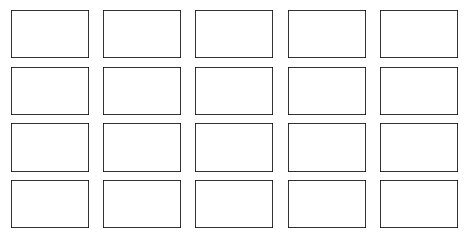

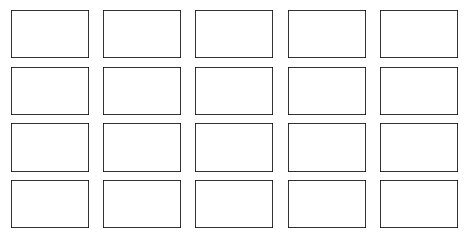

In [7]:
# 将原特征矩阵可视化

#数据本身是图像，和数据本身只是数字，使用的可视化方法不同
#创建画布和子图对象
fig, axes = plt.subplots(4,5   #4行5列
                         ,figsize=(8,4)  #4行5列总共的画布大小
                         ,subplot_kw = {"xticks":[],"yticks":[]}
                        )#不要显示坐标轴 
fig

In [13]:
print(axes)
#不难发现，axes中的一个对象对应fig中的一个空格
#我们希望，在每个子图对象中填充图像（共24张图），因此我们需要写一个在子图对象中遍历的循环
print('axex.shape:{}'.format(axes.shape))

[[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F10A79F98>
axex.shape:(4, 5)


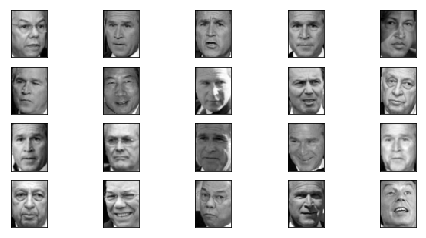

In [20]:
#二维结构，可以有两种循环方式，一种是使用索引，循环一次同时生成一列上的三个图
#另一种是把数据拉成一维，循环一次只生成一个图
#在这里，究竟使用哪一种循环方式，是要看我们要画的图的信息，储存在一个怎样的结构里
#我们使用子图对象.imshow 来将图像填充到空白画布上
#而imshow要求的数据格式必须是一个(m,n)格式的矩阵，即每个数据都是一张单独的图
#因此我们需要遍历的是faces.images，其结构是(1277, 62, 47)
#要从一个数据集中取出24个图，明显是一次性的循环切片[i,:,:]来得便利#因此我们要把axes的结构拉成一维来循环

'''填充图像'''
fig, axes = plt.subplots(4,5   #4行5列
                         ,figsize=(8,4)  #4行5列总共的画布大小
                         ,subplot_kw = {"xticks":[],"yticks":[]}
                        )#不要显示坐标轴 
#enumerate 给对象每个都加上索引

for i,ax in enumerate(axes.flat):  #.flat变成一个一维的数组相当于一个列表
    ax.imshow(faces.images[i,:,:]#第i张图的全部特征矩阵
              ,cmap="gray" #选择色彩的模式
             )

In [21]:
'''建模降维，提取新特征空间矩阵'''
#原本有2900维，我们现在来降到150维
pca = PCA(150).fit(X)
V = pca.components_  #V(k,n)
print('V.shape:{}'.format(V.shape))

V.shape:(150, 2914)


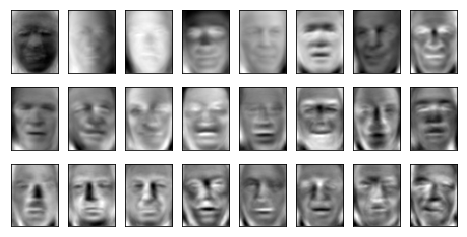

In [22]:
'''将新特征空间矩阵可视化'''

fig, axes = plt.subplots(3,8,figsize=(8,4),subplot_kw = {"xticks":[],"yticks":[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(V[i,:].reshape(62,47),cmap = 'gray')
'''比起降维前的数据，新特征空间可视化后的人脸非常模糊，这是因为原始数据还没有被映射到特征空间中'''

#### inverse_transform将降维后的数据返回到原特征空间中，形成结构为（m,n）的矩阵X*,但仅带有降噪后的信息，该功能可以用来降噪。

###### 迷你案例：用人脸识别看PCA降维后的信息保存量
人脸识别是最容易的，用来探索inverse_transform功能的数据。我们先调用一组人脸数据X(m,n)，对人脸图像进行绘制，然后我们对人脸数据进行降维得到X_dr，之后再使用inverse_transform(X_dr)返回一个X_inverse(m,n)，并对这个新矩阵中的人脸图像也进行绘制。如果PCA的降维过程是可逆的，我们应当期待X(m,n)和X_inverse(m,n)返回一模一样的图像，即携带一模一样的信息。

In [23]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

faces = fetch_lfw_people(min_faces_per_person=60)
X = faces.data

#建模降维后，获取降维后的特征矩阵X_dr
pca = PCA(150)
X_dr = pca.fit_transform(X)
print('X_dr.shape;{}'.format(X_dr.shape))

X_dr.shape;(1348, 150)


In [24]:
# 将降维后的矩阵用inverse_transform返回原空间
X_inverse = pca.inverse_transform(X_dr)
print('X_inverse.shape:{}'.format(X_inverse.shape))

X_inverse.shape:(1348, 2914)


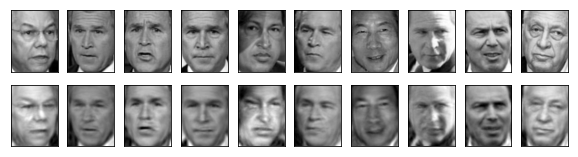

In [27]:
# 将特征矩阵x和X_inverse可视化

fig, ax = plt.subplots(2,10,figsize=(10,2.5)
                       ,subplot_kw={"xticks":[],"yticks":[]}
                      )

for i in range(10):
    ax[0,i].imshow(faces.images[i,:,:],cmap="binary_r")
    ax[1,i].imshow(X_inverse[i].reshape(62,47),cmap="binary_r")

'''可以明显看出，这两组数据可视化后，由降维后再通过inverse_transform转换为维度的数据画出的图像和源数据画的
图像大致相似，但源数据的图像明显更加清晰。这说明，inverse_transform并没有实现数据的完全逆转。这是因为，在降
维的时候，部分信息已经被舍弃了，X_dr中往往不会包含原数据100%的信息，所以在逆转的时候，即便维度升高，原数据中
已经被舍弃的信息也不可能再回来了。所以，降维不是完全可逆的。'''

##### 迷你案例：用PCA做噪音过滤
降维的目的之一就是希望抛弃掉对模型带来负面影响的特征，而我们相信，带有效信息的特征的方差应该是远大于噪音的，所以相比噪音，有效的特征所带的信息应该不会在PCA过程中被大量抛弃。inverse_transform能够在不恢复原始数据的情况下，将降维后的数据返回到原本的高维空间，即是说能够实现”保证维度，但去掉方差很小特征所带的信息。”。利用inverse_transform的这个性质，我们能够实现噪音过滤。

In [1]:
# 导入所需要的库和模块
from sklearn.datasets import load_digits  #手写数字识别数据as
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

digits = load_digits()
print('digits.data.shape:{}'.format(digits.data.shape))

digits.data.shape:(1797, 64)


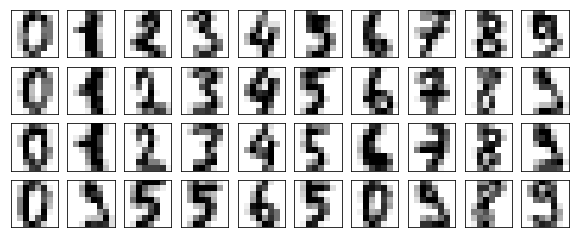

In [2]:
# 定义画图函数
def plot_digits(data):    
    fig, axes = plt.subplots(4,10,figsize=(10,4)
                             ,subplot_kw = {"xticks":[],"yticks":[]}
                            )    
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8),cmap="binary")
        
plot_digits(digits.data)

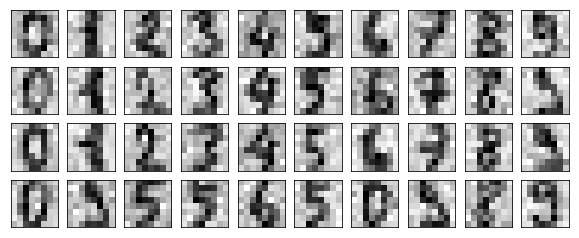

In [3]:
'''为数据加上噪音'''
np.random.RandomState(42)

#在指定的数据集中，随机抽取服从正态分布的数据
#两个参数，分别是指定的数据集，和抽取出来的正太分布的方差
noisy = np.random.normal(digits.data,2)
plot_digits(noisy)

In [4]:
# 降维
pca = PCA(0.5).fit(noisy)  #保留百分之50的特征
X_dr = pca.transform(noisy)
print('X_dr.shape:{}'.format(X_dr.shape))
'''只剩下六个特征'''

X_dr.shape:(1797, 6)


without_noise.shape(1797, 64)


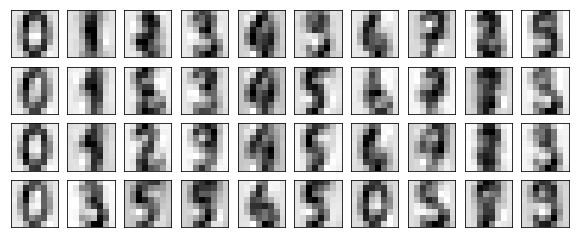

In [6]:
'''逆转降维结果，实现降噪'''
without_noise = pca.inverse_transform(X_dr)
plot_digits(without_noise)
print('without_noise.shape{}'.format(without_noise.shape))  #升维到了64维

###### 案例：PCA对手写数字数据集的降维

In [11]:
#导入需要的模块和库
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# 导入数据，探索数据
data = pd.read_csv(r'digit recognizor.csv')
X = data.iloc[:,1:]  #所有行 从第一列到最后一列
y = data.iloc[:,0]  #所有行 取第0列
print('X.shape:{}'.format(X.shape))

X.shape:(42000, 784)


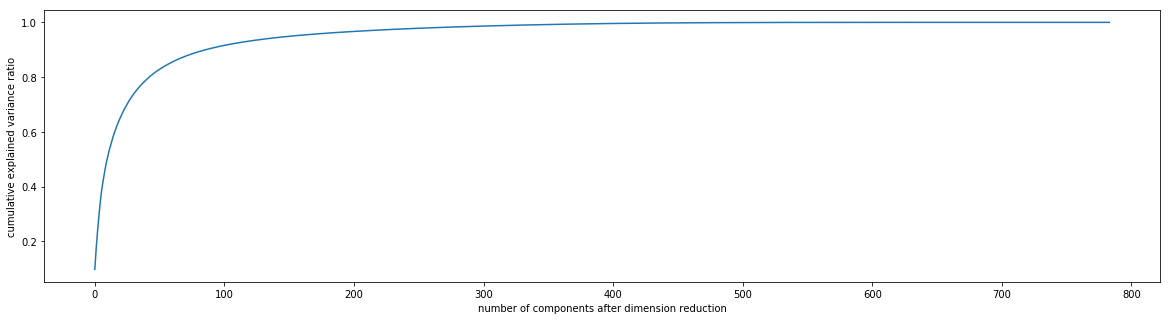

In [10]:
# 画累计方差贡献率曲线，找最佳降维后维度的范围

pca_line = PCA().fit(X)
plt.figure(figsize=[20,5])
plt.plot(np.cumsum(pca_line.explained_variance_ratio_))
plt.xlabel('number of components after dimension reduction')
plt.ylabel('cumulative explained variance ratio') #累计方差贡献率曲线
plt.show()
'''0-200中必然有我们想要的'''
'''explained_variance_ratio_，它代表降维后的各主成分的方差值占总方差值的比例，这个比例越大，则越是
重要的主成分。'''

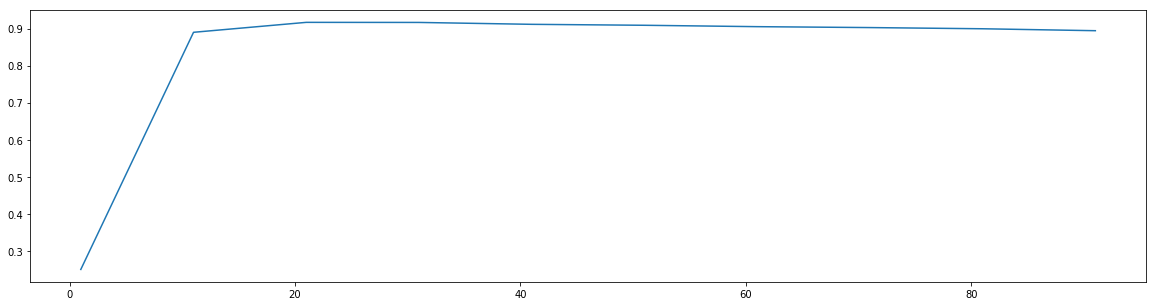

In [13]:
# 降维后维度的学习曲线，继续缩小最佳维度范围

score = []
for i in range(1,101,10):
    X_dr = PCA(i).fit_transform(X)
    once = cross_val_score(RFC(n_estimators=10,random_state=0),X_dr,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(1,101,10),score)
plt.show()

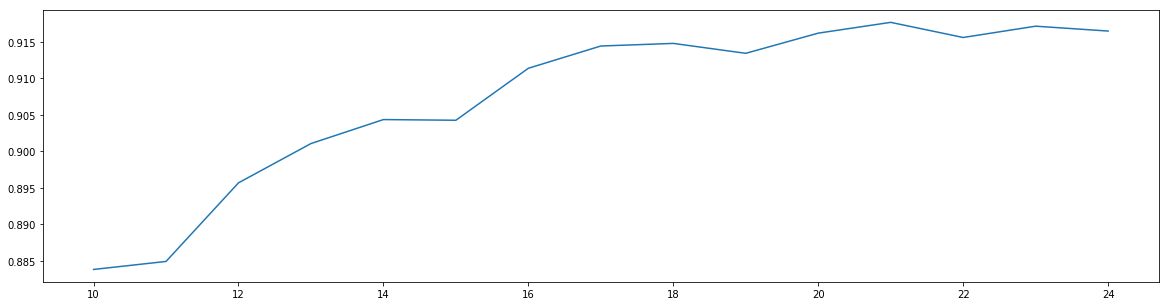

In [14]:
# 细化学习曲线，找出降维后的最佳维度

score = []
for i in range(10,25):
    X_dr = PCA(i).fit_transform(X)
    once = cross_val_score(RFC(n_estimators=10,random_state=0),X_dr,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(10,25),score)
plt.show()
'''可以看出n_components=21时效果最好'''

In [18]:
X_dr = PCA(21).fit_transform(X)

print('X_dr.shape:{}'.format(X_dr.shape))  #变成了21维 原来是700+维
print('cross_val_score:{}'.format(cross_val_score(RFC(n_estimators=100,random_state=0),X_dr,y,cv=5).mean()))

X_dr.shape:(42000, 21)
cross_val_score:0.9436193302149697


In [19]:
'''换一种模型'''  #能够使用KNN的前提 降维到了21维不是700+维
from sklearn.neighbors import KNeighborsClassifier as KNN
print('cross_val_score:{}'.format(cross_val_score(KNN(),X_dr,y,cv=5).mean()))

cross_val_score:0.967690054289713


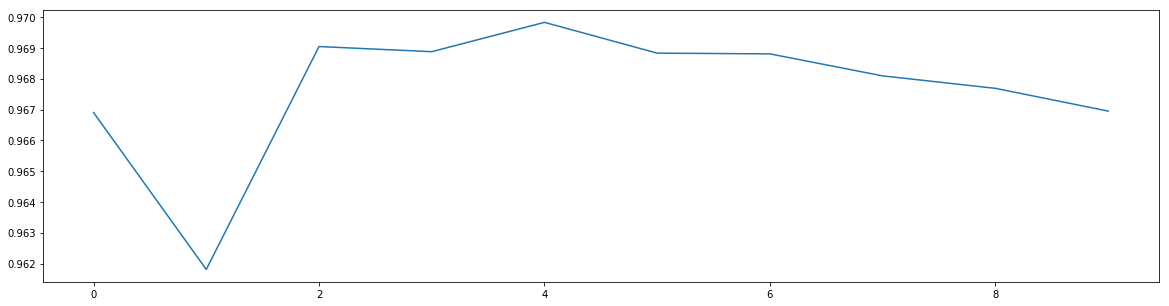

In [20]:
#knn 的k值学习曲线
score = []
for i in range(10):
    X_dr = PCA(23).fit_transform(X)
    once = cross_val_score(KNN(i+1),X_dr,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(10),score)
plt.show()

In [22]:
%%timeit

# 定下超参数后，模型效果如何，模型运行时间如何
#=======【TIME WARNING: 3mins】======#
cross_val_score(KNN(4),X_dr,y,cv=5).mean()

45.3 s ± 2.77 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


![Title](1579685560(1).jpg)

![Title](1579685731(1).jpg)